<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/04_Hazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


wine = load_wine()
#print(data.DESCR)

cols=["Alcohol","Malic acid","Ash","Alcalionity","Magnesium","Total Phenol","Flavanoids",
                                             "Nonflavor","Proanthocyanins","Color intensity","Hue","OD280_OD315","Proline"]
df=pd.DataFrame(wine["data"][:,0:13],columns=cols)
'''

		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline])
'''
print(df)
maxi=df.max()
mini=df.min()
print(maxi,mini)
df2=(df-mini)
delta=maxi-mini
df_feature=df2/delta


     Alcohol  Malic acid   Ash  ...   Hue  OD280_OD315  Proline
0      14.23        1.71  2.43  ...  1.04         3.92   1065.0
1      13.20        1.78  2.14  ...  1.05         3.40   1050.0
2      13.16        2.36  2.67  ...  1.03         3.17   1185.0
3      14.37        1.95  2.50  ...  0.86         3.45   1480.0
4      13.24        2.59  2.87  ...  1.04         2.93    735.0
..       ...         ...   ...  ...   ...          ...      ...
173    13.71        5.65  2.45  ...  0.64         1.74    740.0
174    13.40        3.91  2.48  ...  0.70         1.56    750.0
175    13.27        4.28  2.26  ...  0.59         1.56    835.0
176    13.17        2.59  2.37  ...  0.60         1.62    840.0
177    14.13        4.10  2.74  ...  0.61         1.60    560.0

[178 rows x 13 columns]
Alcohol              14.83
Malic acid            5.80
Ash                   3.23
Alcalionity          30.00
Magnesium           162.00
Total Phenol          3.88
Flavanoids            5.08
Nonflavor         

K-Means és DBSCAN Számítás

In [78]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MeanShift
import sklearn.cluster as cluster


from sklearn.decomposition import PCA

n_cluster_num=3
clusterer = KMeans(n_clusters=n_cluster_num, random_state=10)
cluster_labels_Kmeans = clusterer.fit_predict(df_feature)

clusterer=DBSCAN(eps=0.45)
cluster_label_DBScan=clusterer.fit_predict(df_feature)

clusterer=Birch(n_clusters=n_cluster_num)
cluster_label_Birch=clusterer.fit_predict(df_feature)

bandwidth = cluster.estimate_bandwidth(df_feature, quantile=0.15)
clusterer=MeanShift(bin_seeding=True,bandwidth=bandwidth)
cluster_label_MeanShift=clusterer.fit_predict(df_feature)



a_pca=PCA(n_components=3)
data_pca=a_pca.fit_transform(df_feature)

Y=wine.target

K-Means

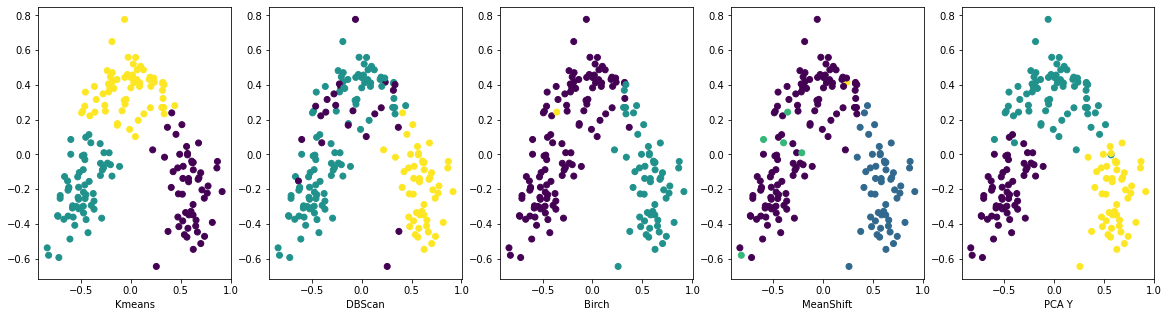

In [77]:
# Kezdjünk új ábrát (plt.figure)!
plt.figure(figsize=(20,5))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.subplot(151)
plt.xlabel("Kmeans")
plt.scatter(data_pca[:,0],data_pca[:,1],c=cluster_labels_Kmeans)
# Állítsuk be a tengelyek címkéit és a címet!
plt.subplot(152)
plt.xlabel("DBScan")
plt.scatter(data_pca[:,0],data_pca[:,1],c=cluster_label_DBScan)

plt.subplot(153)
plt.xlabel("Birch")
plt.scatter(data_pca[:,0],data_pca[:,1],c=cluster_label_Birch)

plt.subplot(154)

plt.xlabel("MeanShift")
plt.scatter(data_pca[:,0],data_pca[:,1],c=cluster_label_MeanShift)

plt.subplot(155)
plt.xlabel("PCA Y")
plt.scatter(data_pca[:,0],data_pca[:,1],c=Y)
...
# Jelenítsük meg a plt.show metódus segítségével!
plt.show()

### DBSCAN vizsgálat : epsilon hatása


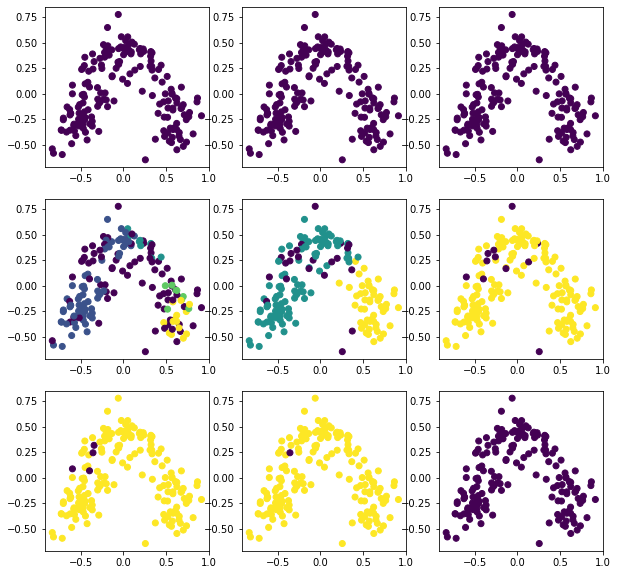

In [93]:
plt.figure(figsize=(10,10))
db=1
epslist=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#epslist=[0.48,0.485,0.490,0.495,0.5,0.505,0.51,0.515,0.52]
for epsint in epslist:
    plt.subplot(3,3,db)
    db+=1
    clusterer=DBSCAN(eps=epsint)
    cluster_label_DBScan=clusterer.fit_predict(df_feature)
    
    plt.scatter(data_pca[:,0],data_pca[:,1],c=cluster_label_DBScan)

plt.show()

In [52]:
#nézzuk hogy néznek ki a klasterek valójában:

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


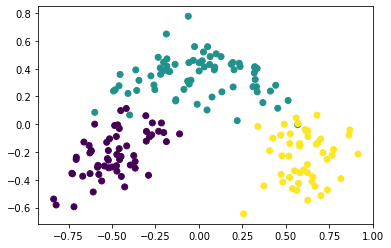

In [87]:
plt.figure()
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.scatter(data_pca[:,0],data_pca[:,1],c=Y)
# Állítsuk be a tengelyek címkéit és a címet!
...
...
...
# Jelenítsük meg a plt.show metódus segítségével!
plt.show()

Kezdjünk másik clusterer algoval...

In [ ]:
# mi van, ha nem skálázzuk át?
df_feature=df
df_feature["Alcohol"]


0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64

In [ ]:
print(df_feature["Alcohol"])

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64


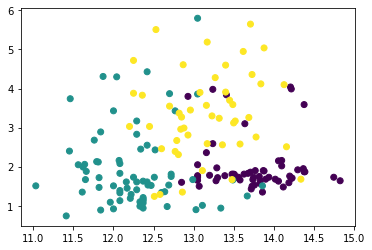

In [ ]:
plt.figure()
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.scatter(list(df_feature["Alcohol"]),list(df_feature["Malic acid"]),c=Y)
# Állítsuk be a tengelyek címkéit és a címet!
...
...
...
# Jelenítsük meg a plt.show metódus segítségével!
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


<Figure size 1600x1600 with 0 Axes>

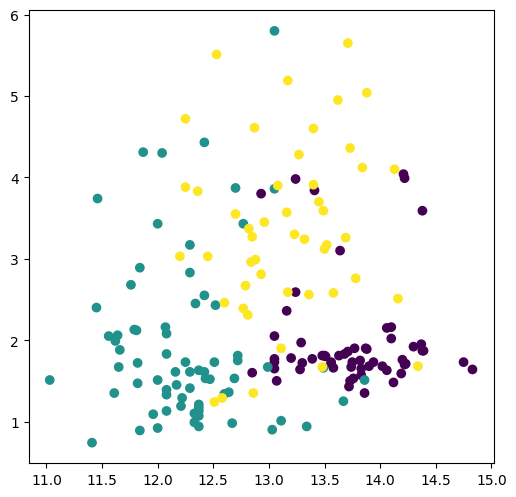

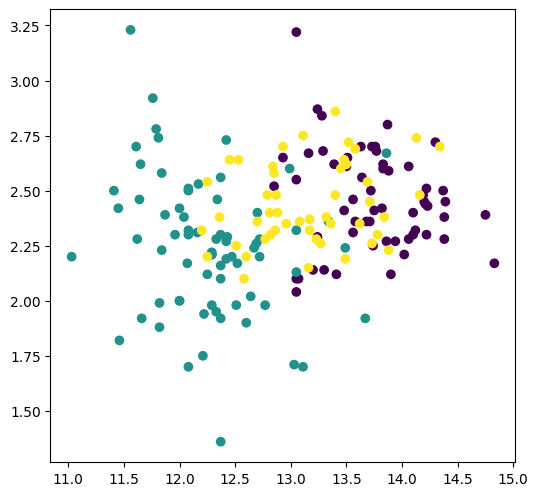

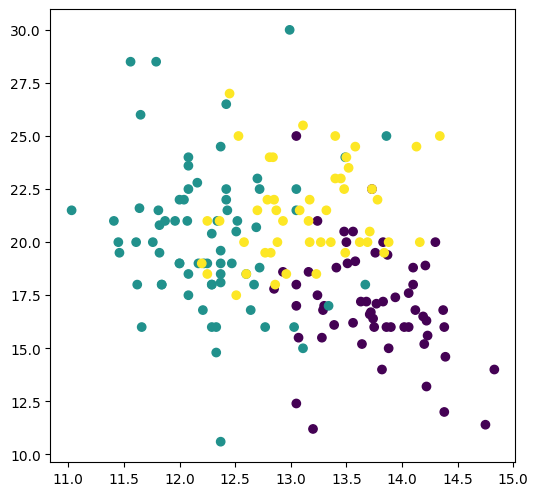

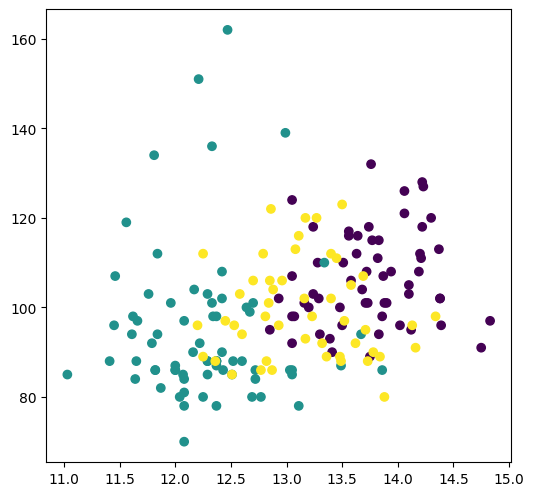

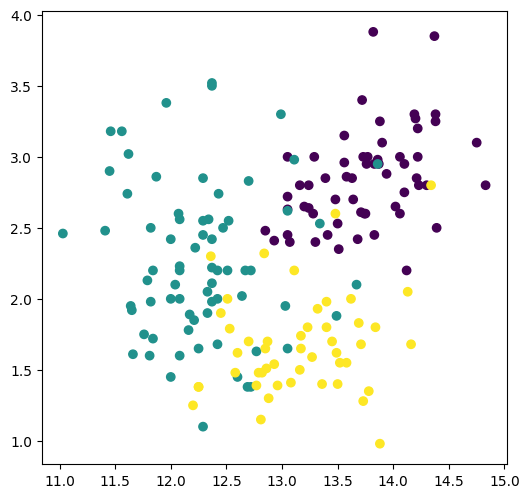

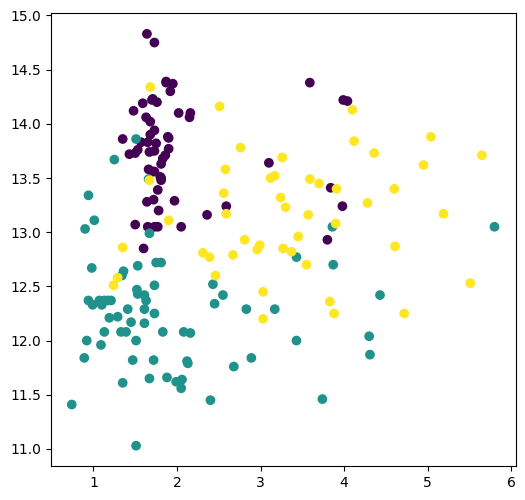

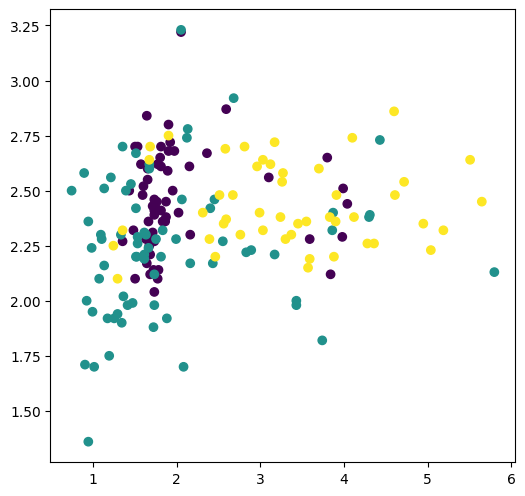

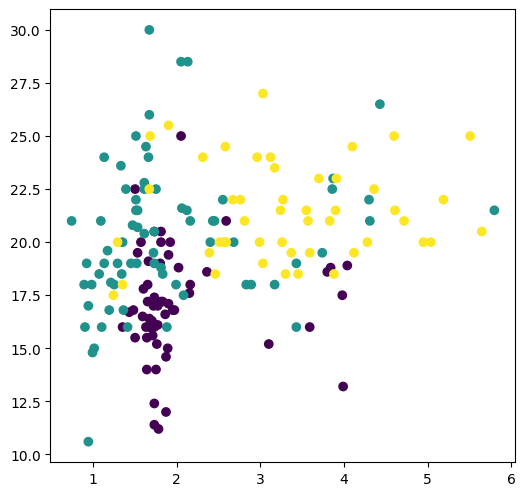

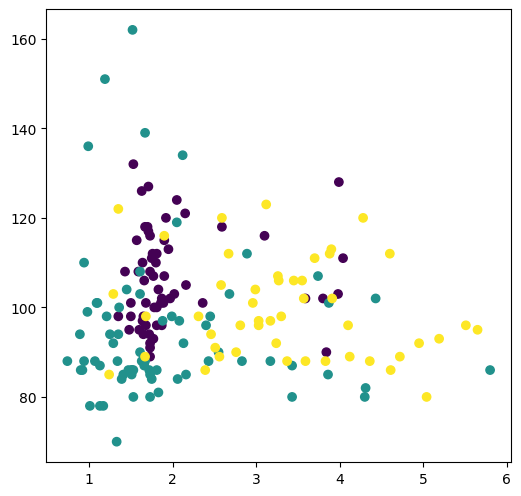

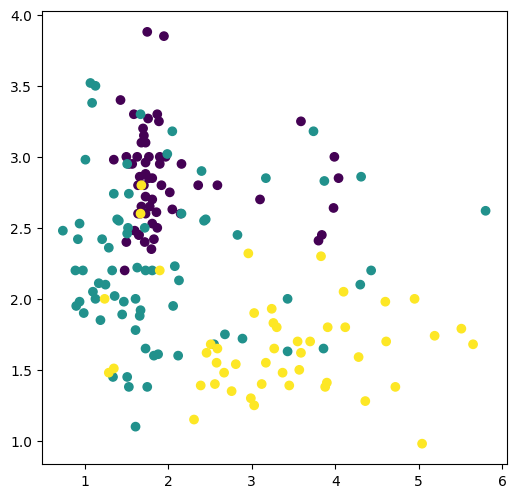

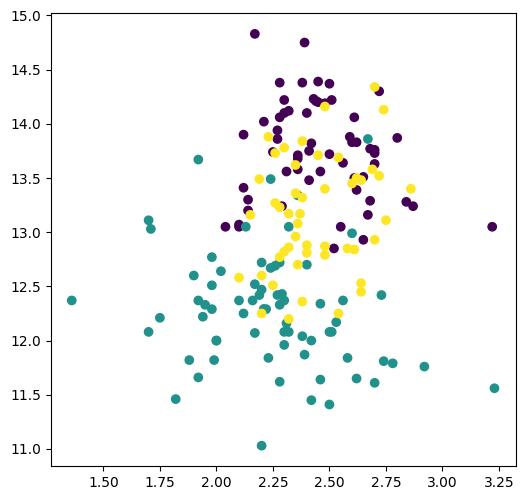

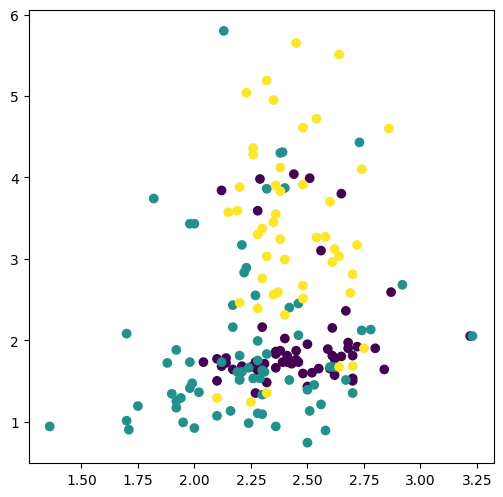

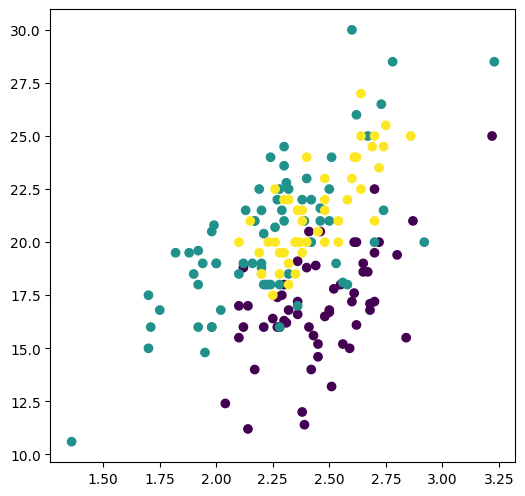

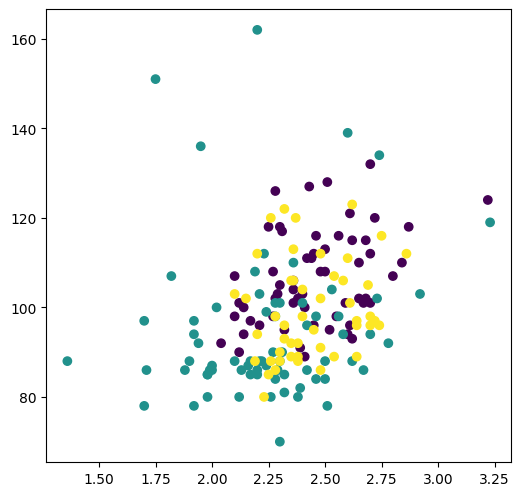

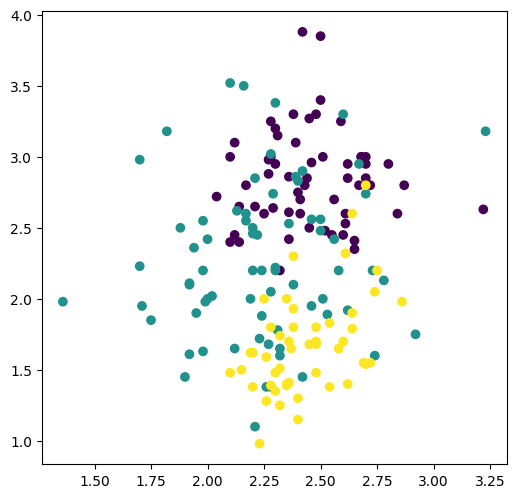

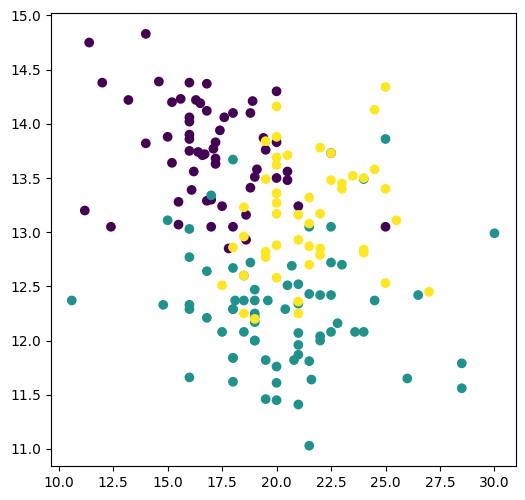

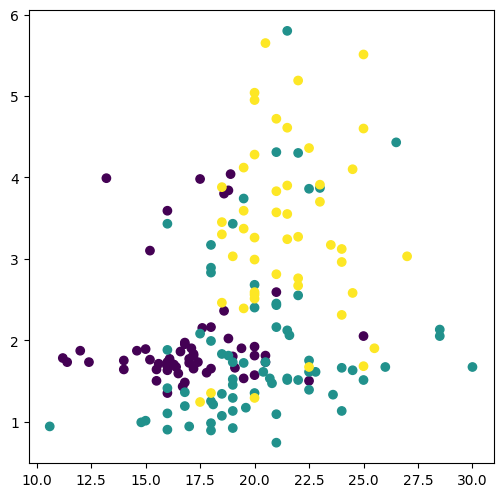

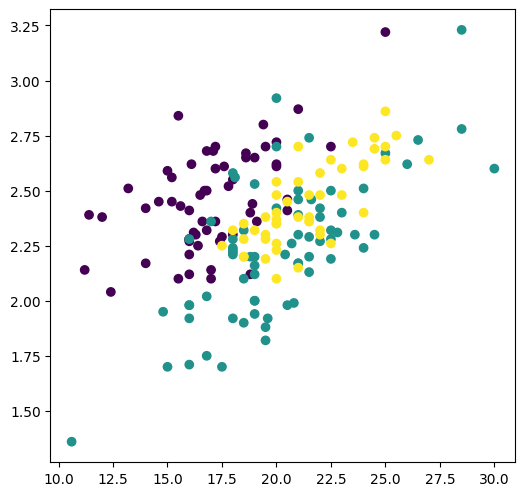

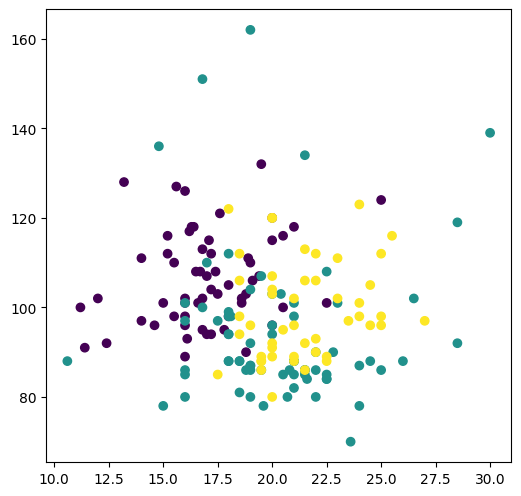

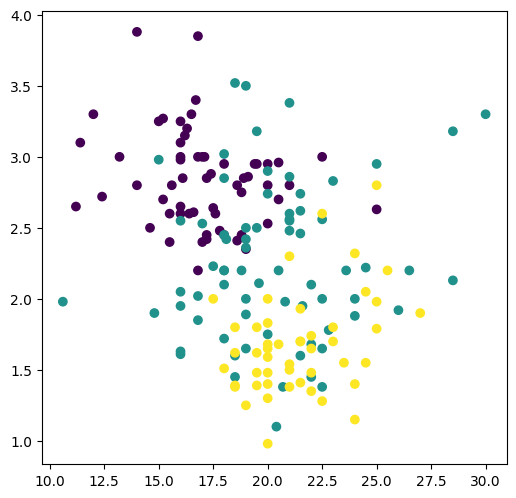

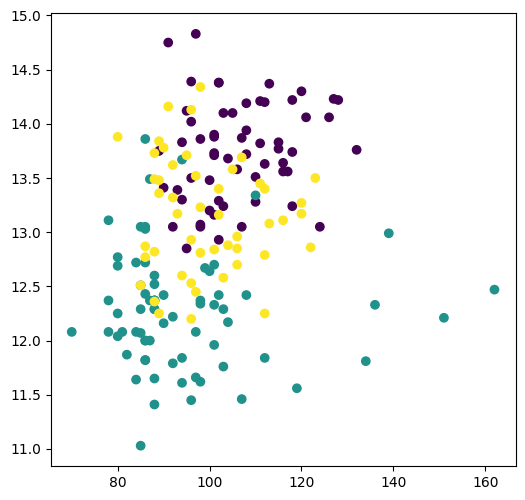

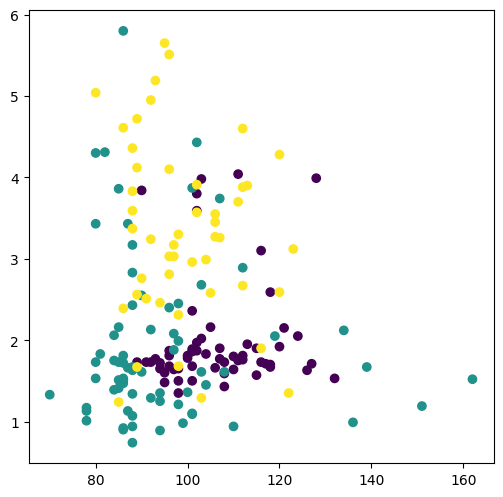

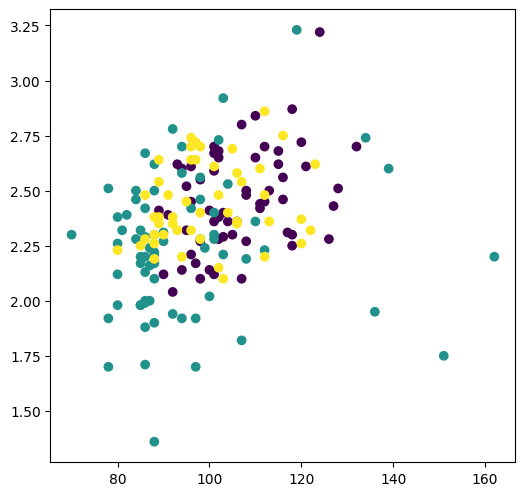

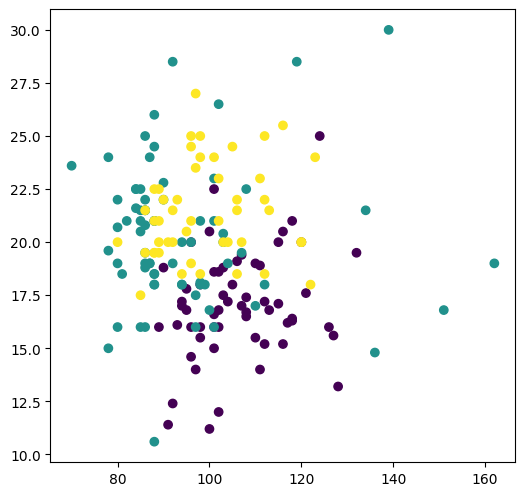

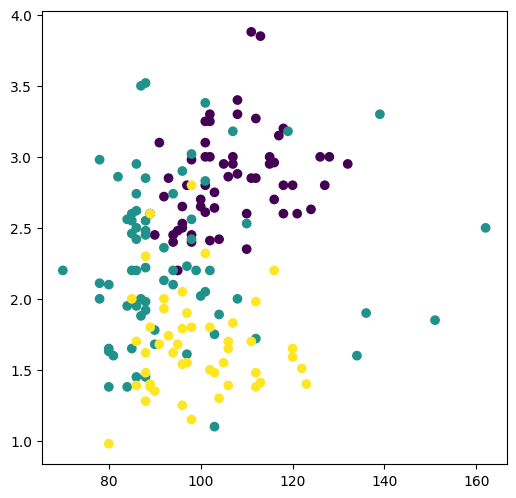

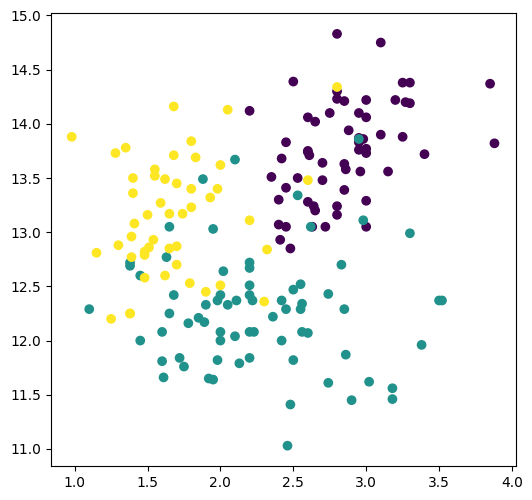

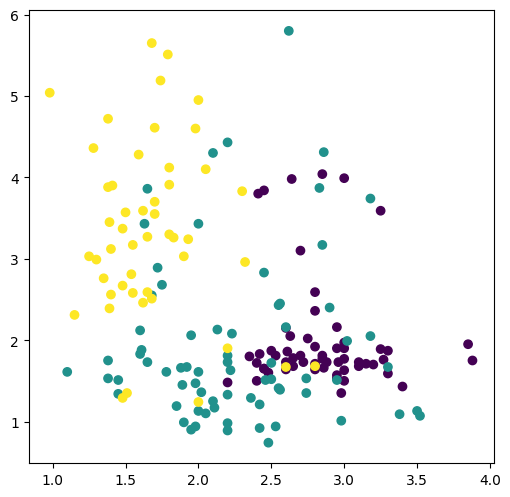

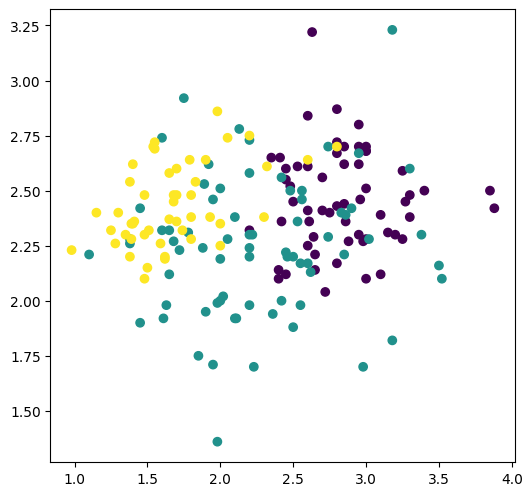

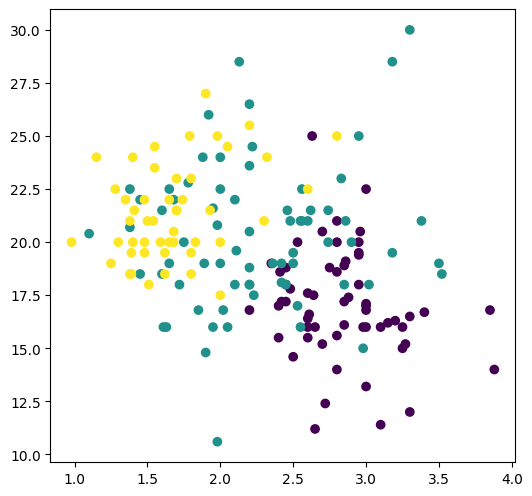

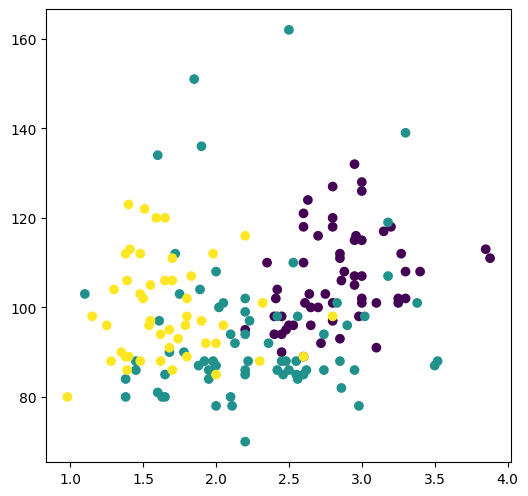

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16), dpi=100)
#plt.subplots(nrows=6, ncols=6)
for i in range(6):
    for j in range(6):
        #plt.subplot(6,6,i*6+j+1)
        if i!=j:
            plt.figure(figsize=(6,6), dpi=100)
            plt.scatter(df_feature[cols[i]],df_feature[cols[j]],c=Y)
            plt.show()
            #plt.savefig("/content/drive/My Drive/Ingatlan/graf"+str(i)+str(j)+".jpg")

In [ ]:
!ls

drive  sample_data


### **Vizsgálat 2**

In [ ]:

wine = load_wine()
#print(data.DESCR)

cols=["Alcohol","Malic acid","Ash","Alcalionity","Magnesium","Total Phenol","Flavanoids",
                                             "Nonflavor","Proanthocyanins","Color intensity","Hue","OD280_OD315","Proline"]
df=pd.DataFrame(wine["data"][:,0:13],columns=cols)
'''

		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline])
'''
print(df)
maxi=df.max()
mini=df.min()
print(maxi,mini)
df2=(df-mini)
delta=maxi-mini
df_feature=df2/delta

     Alcohol  Malic acid   Ash  ...   Hue  OD280_OD315  Proline
0      14.23        1.71  2.43  ...  1.04         3.92   1065.0
1      13.20        1.78  2.14  ...  1.05         3.40   1050.0
2      13.16        2.36  2.67  ...  1.03         3.17   1185.0
3      14.37        1.95  2.50  ...  0.86         3.45   1480.0
4      13.24        2.59  2.87  ...  1.04         2.93    735.0
..       ...         ...   ...  ...   ...          ...      ...
173    13.71        5.65  2.45  ...  0.64         1.74    740.0
174    13.40        3.91  2.48  ...  0.70         1.56    750.0
175    13.27        4.28  2.26  ...  0.59         1.56    835.0
176    13.17        2.59  2.37  ...  0.60         1.62    840.0
177    14.13        4.10  2.74  ...  0.61         1.60    560.0

[178 rows x 13 columns]
Alcohol              14.83
Malic acid            5.80
Ash                   3.23
Alcalionity          30.00
Magnesium           162.00
Total Phenol          3.88
Flavanoids            5.08
Nonflavor         

### Normalizált

<Figure size 1600x1600 with 0 Axes>

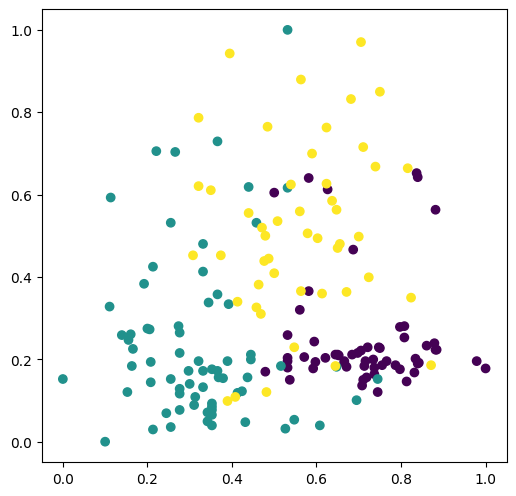

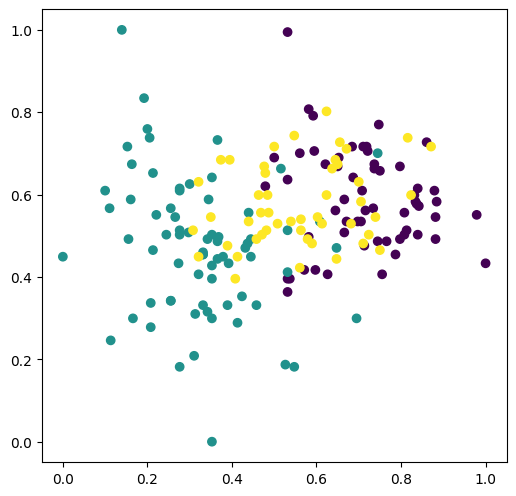

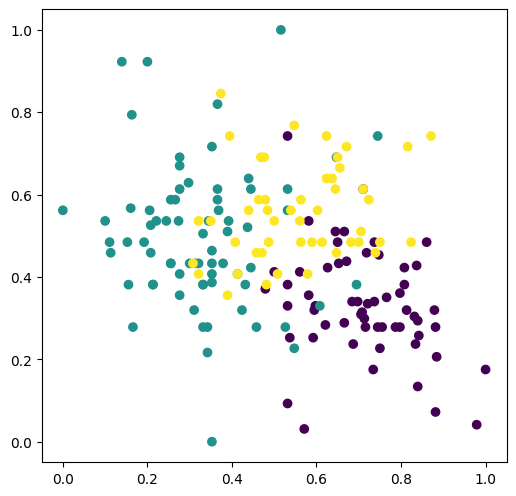

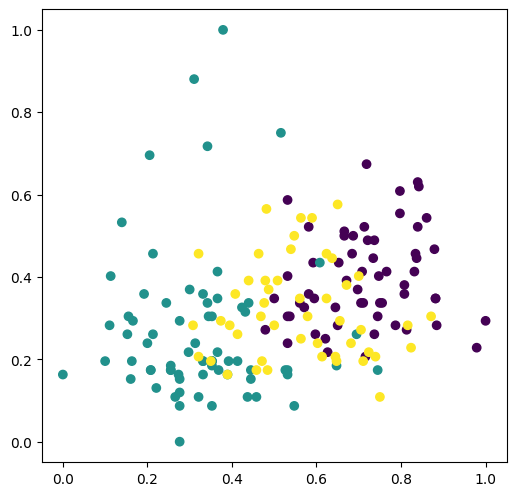

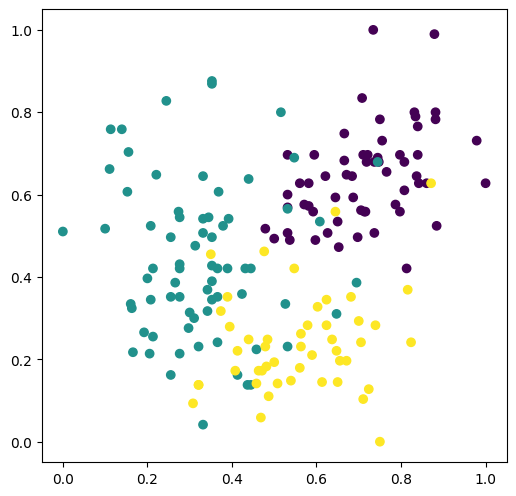

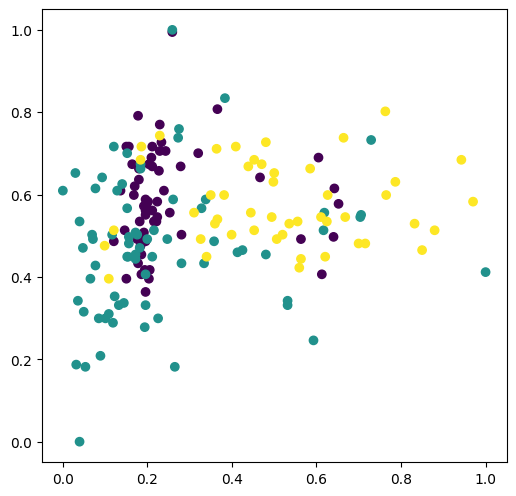

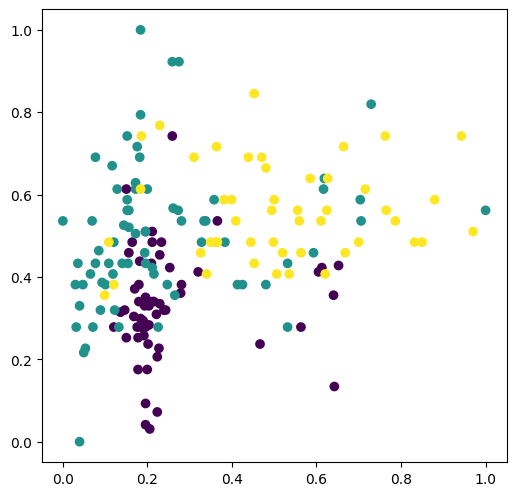

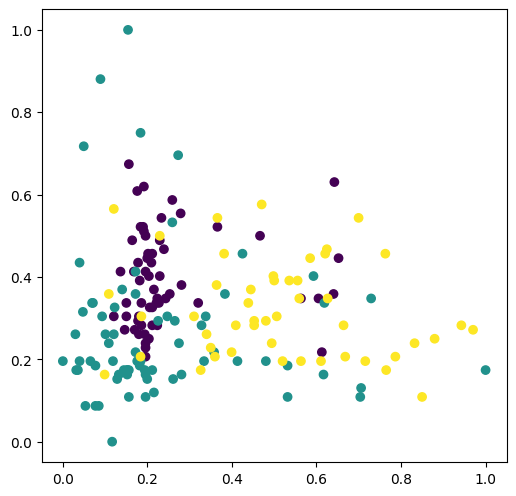

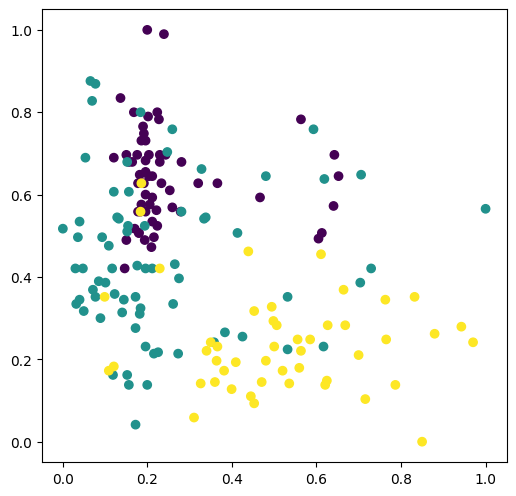

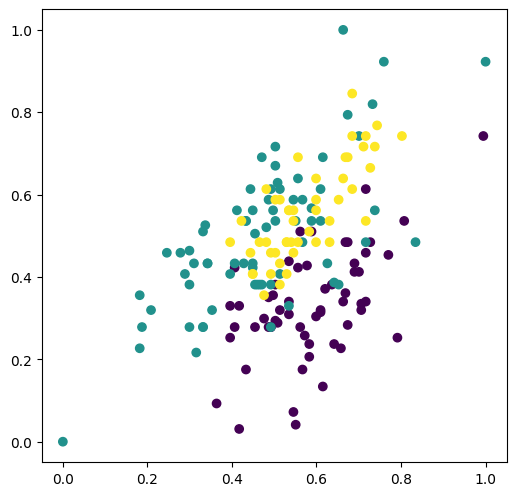

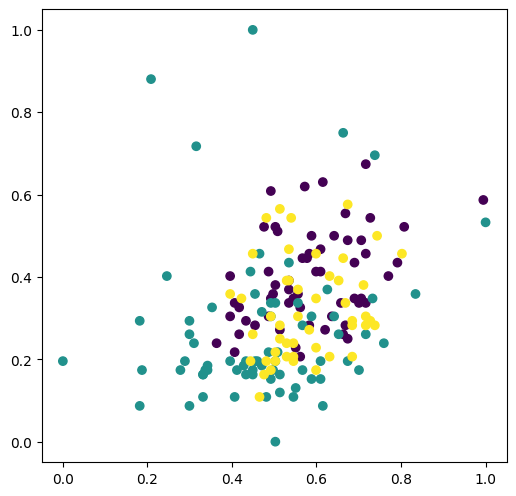

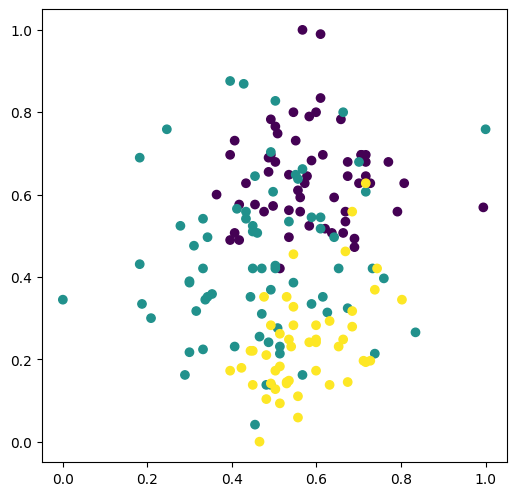

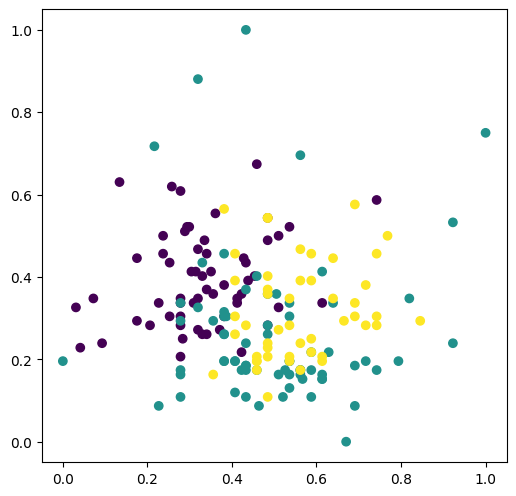

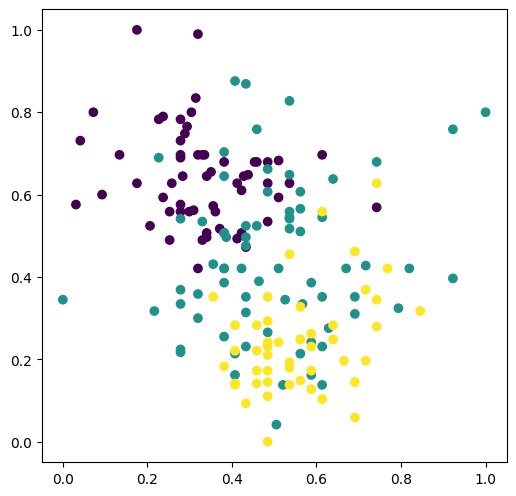

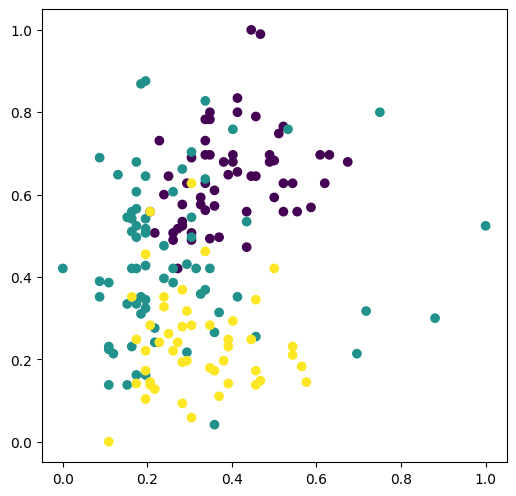

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16), dpi=100)
#plt.subplots(nrows=6, ncols=6)
for i in range(6):
    for j in range(i,6):
        #plt.subplot(6,6,i*6+j+1)
        if i!=j:
            plt.figure(figsize=(6,6), dpi=100)
            plt.scatter(df_feature[cols[i]],df_feature[cols[j]],c=Y)
           
            plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/normalized_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.show()

### ENG UNIT

<Figure size 1600x1600 with 0 Axes>

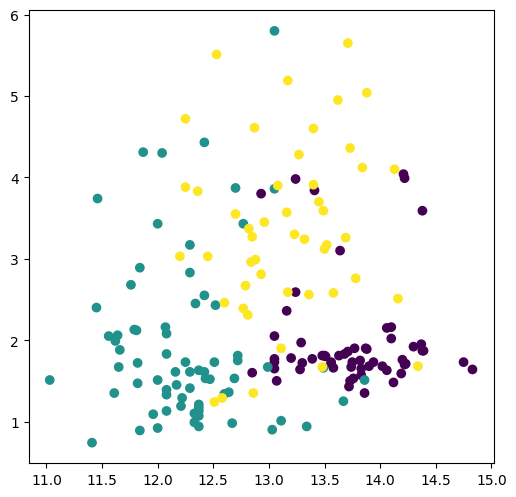

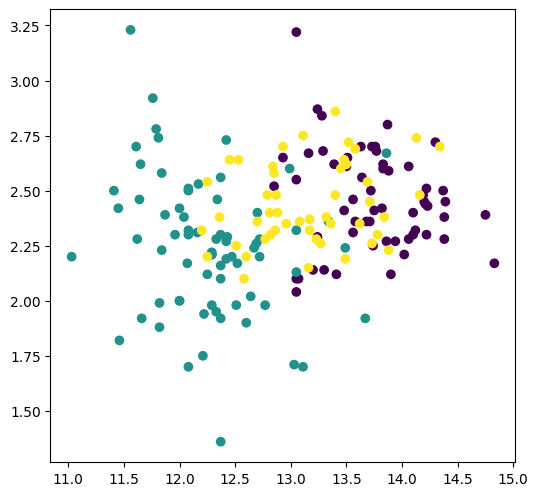

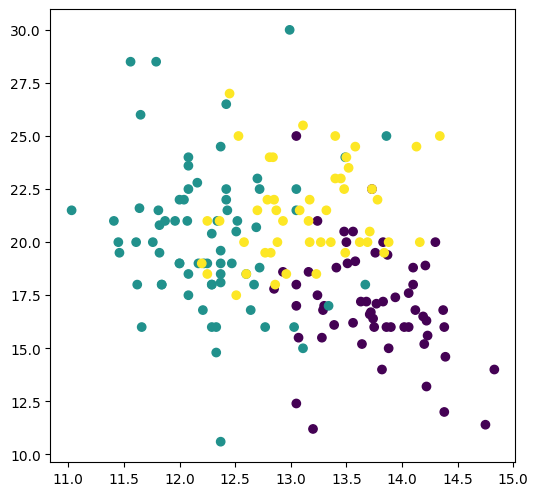

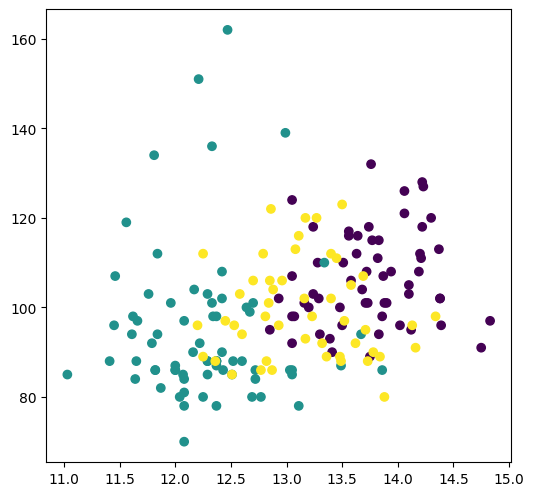

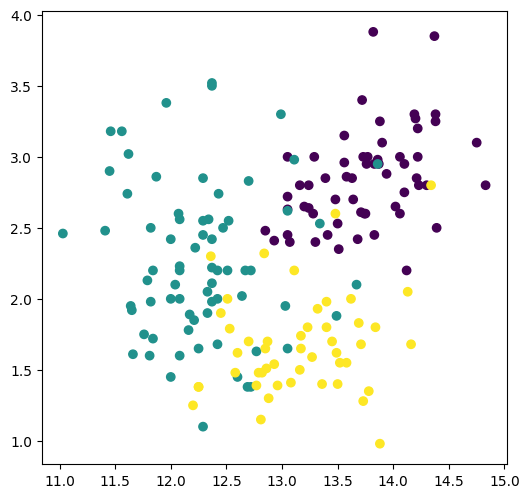

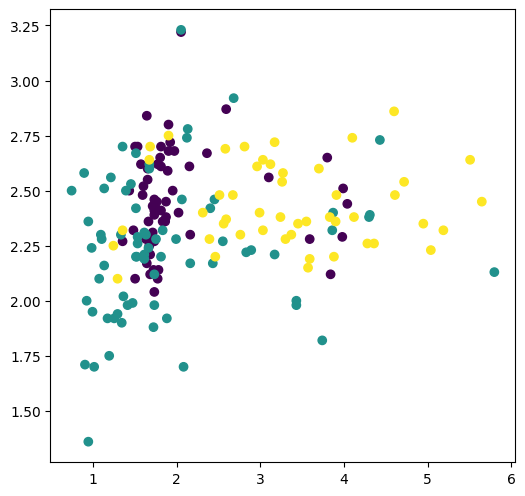

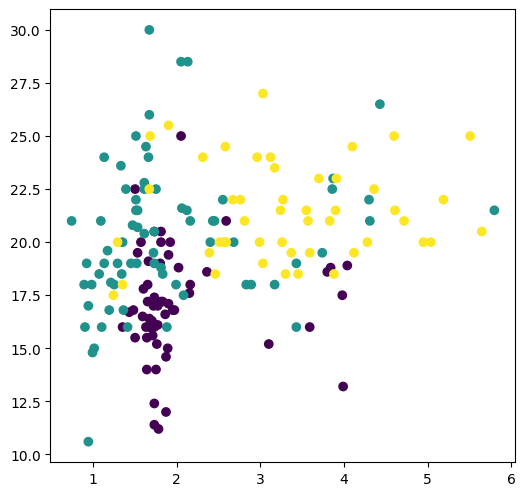

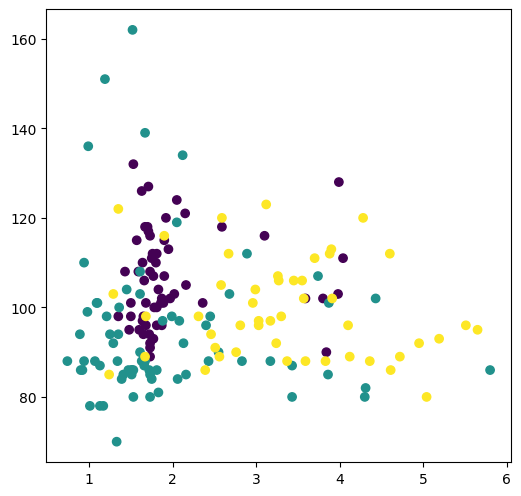

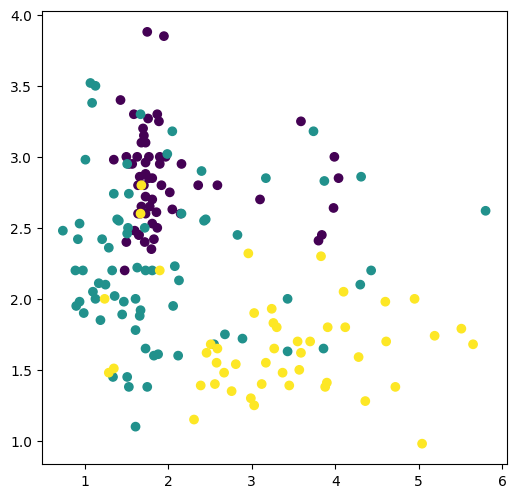

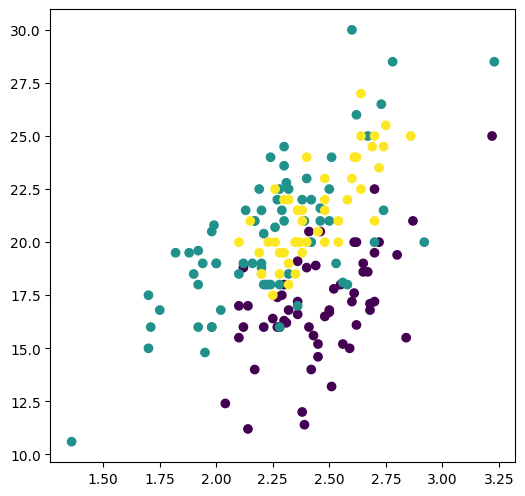

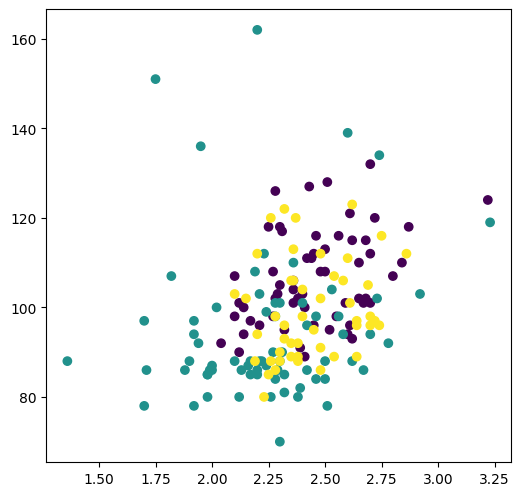

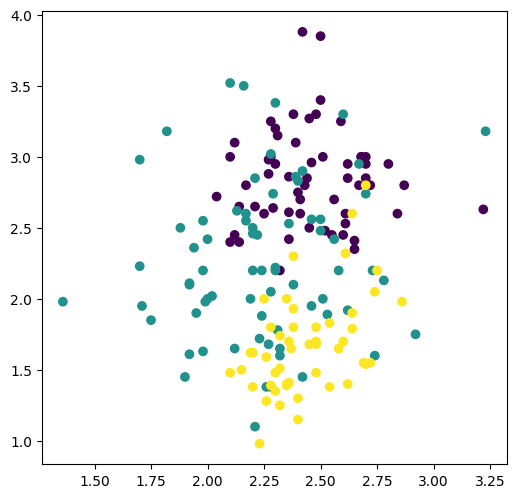

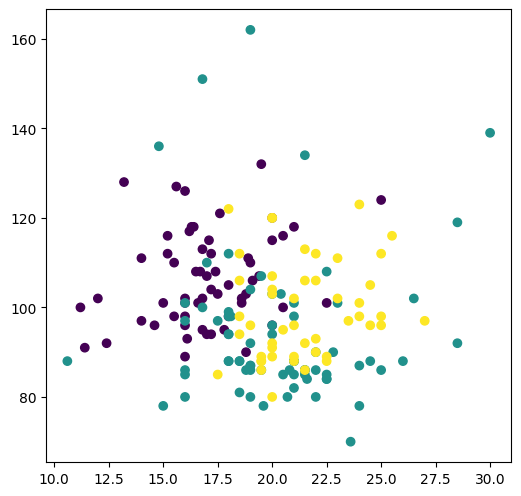

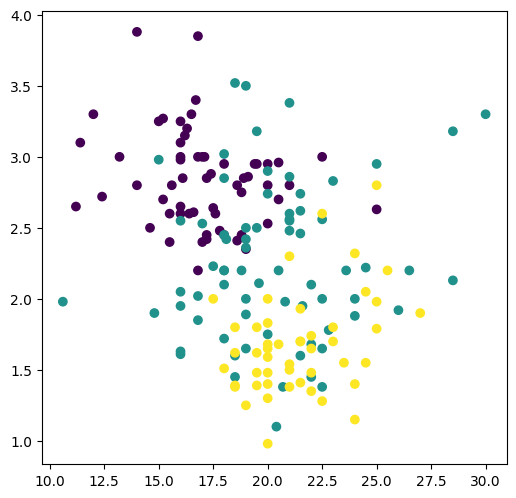

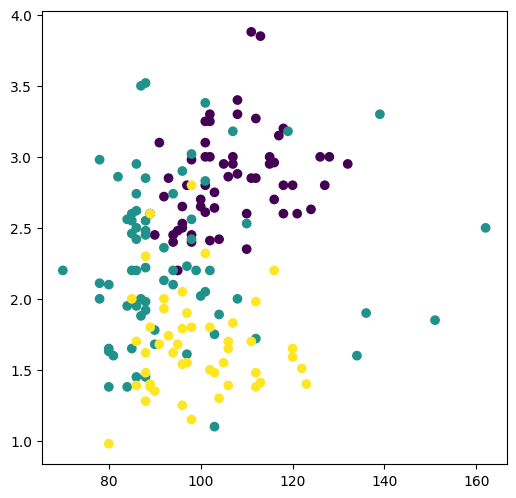

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16), dpi=100)
#plt.subplots(nrows=6, ncols=6)
for i in range(6):
    for j in range(i,6):
        #plt.subplot(6,6,i*6+j+1)
        if i!=j:
            plt.figure(figsize=(6,6), dpi=100)
            plt.scatter(df[cols[i]],df[cols[j]],c=Y)
           
            plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/engunits_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.show()



In [ ]:
from sklearn.decomposition import PCA
a_pca=PCA(n_components=6)
data_pca=a_pca.fit_transform(df_feature)

<Figure size 1600x1600 with 0 Axes>

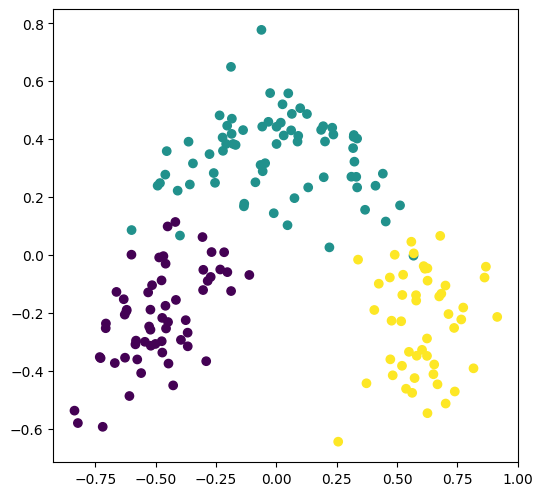

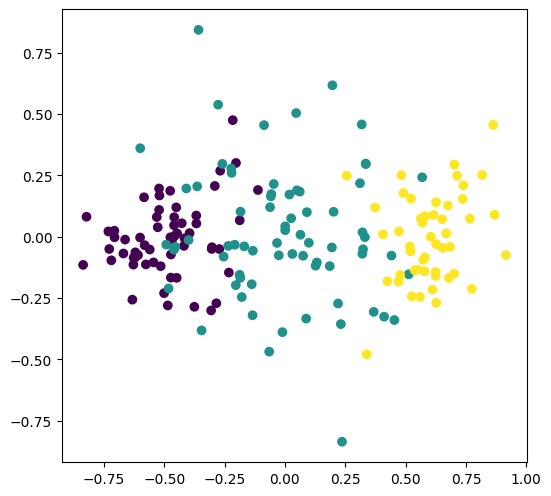

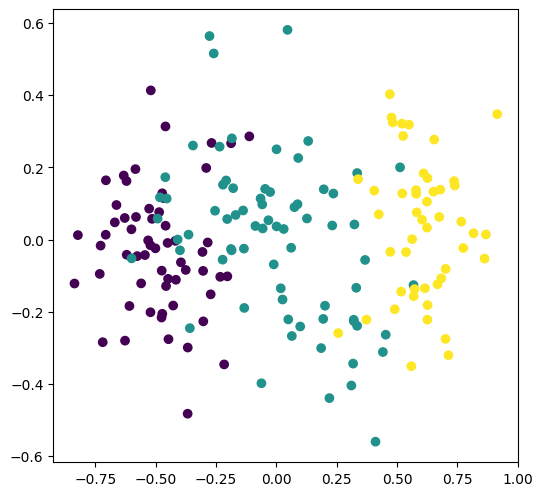

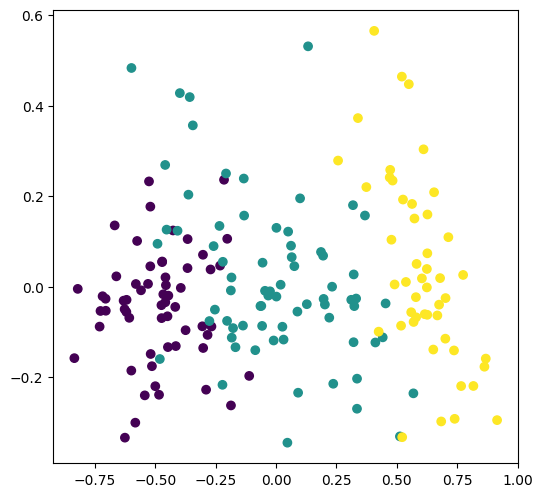

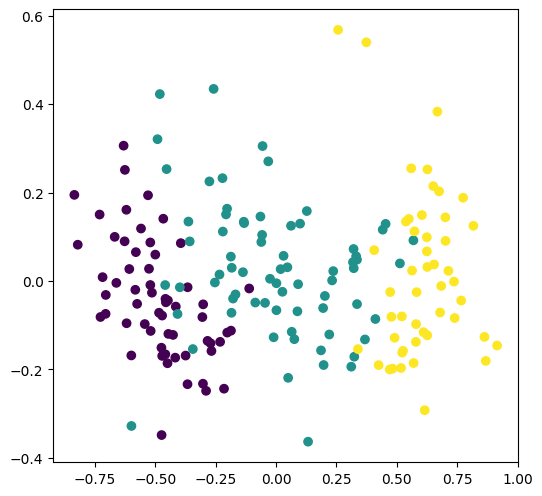

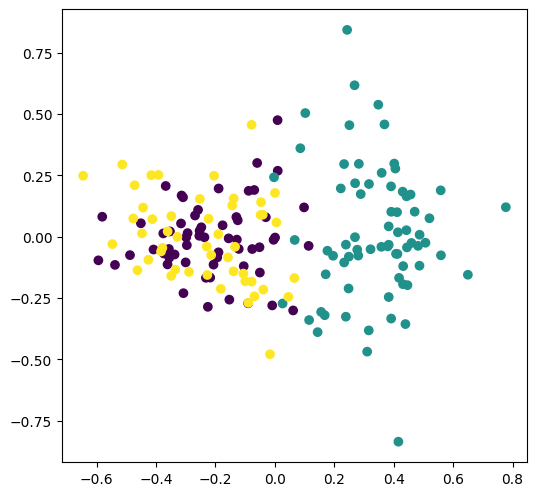

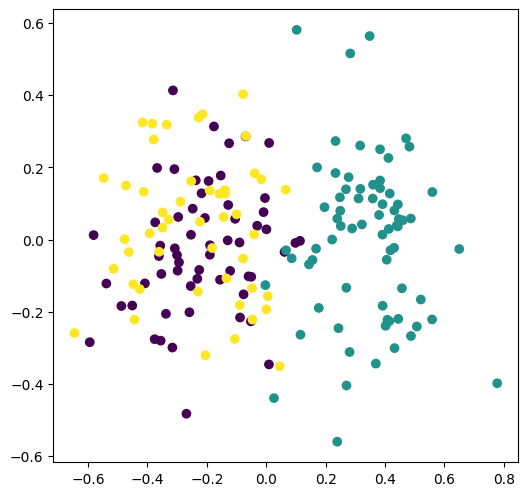

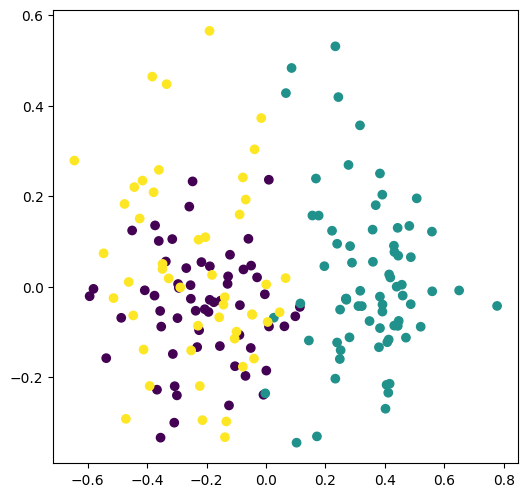

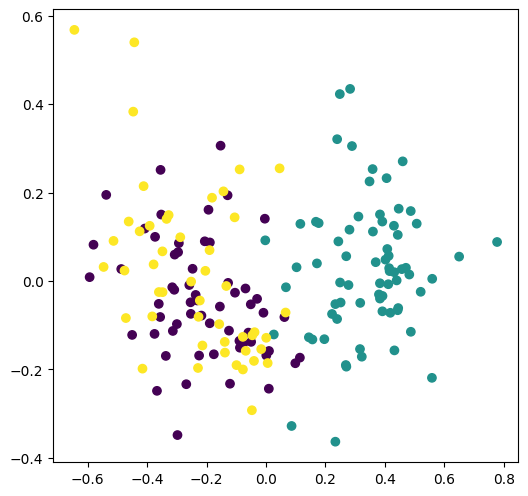

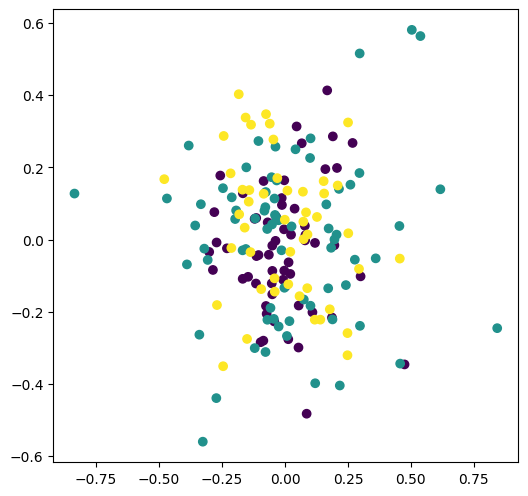

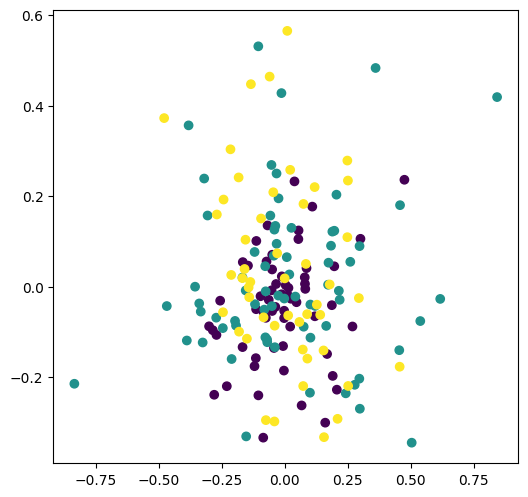

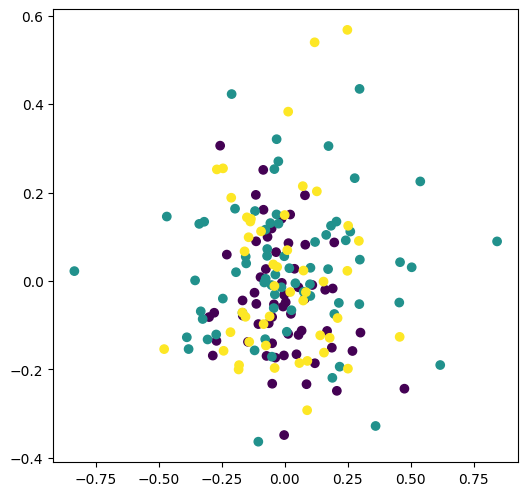

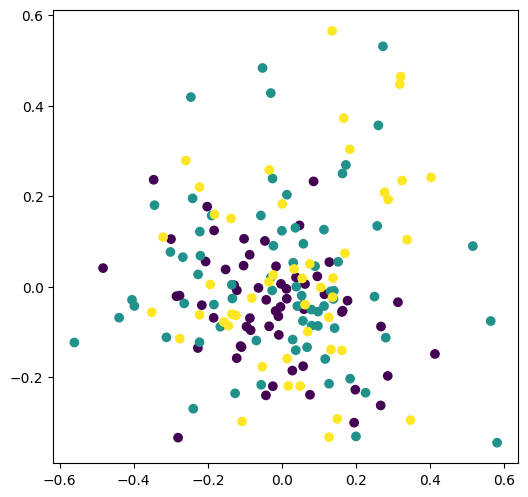

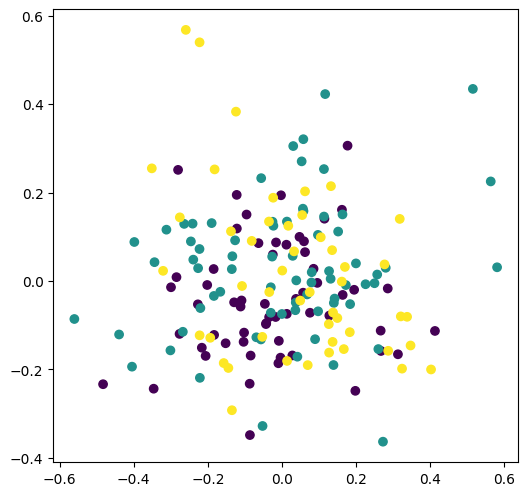

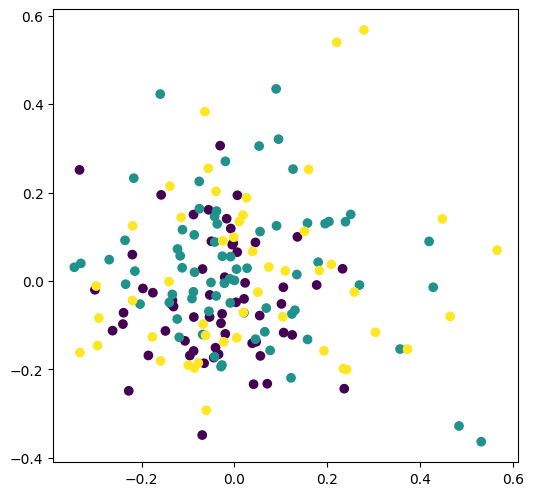

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16), dpi=100)
#plt.subplots(nrows=6, ncols=6)
for i in range(6):
    for j in range(i,6):
        #plt.subplot(6,6,i*6+j+1)
        if i!=j:
            plt.figure(figsize=(6,6), dpi=100)
            plt.scatter(data_pca[:,i],data_pca[:,j],c=Y)
           
            plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/pca_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.show()

In [ ]:
#@title Default title text
from sklearn.decomposition import PCA
a_pca=PCA(n_components=4)
data_pca=a_pca.fit_transform(df_feature)


## NMF módszer:
 lineáris  vizuális n_component kereséssel

1.   Lineáris
2.   



In [ ]:
n_comp=2   # változtass itt, és generálja a grafikonokat!
from sklearn.decomposition import NMF
a_nmf=NMF(n_components=n_comp)
data_nmf=a_nmf.fit_transform(df_feature)

<Figure size 1600x1600 with 0 Axes>

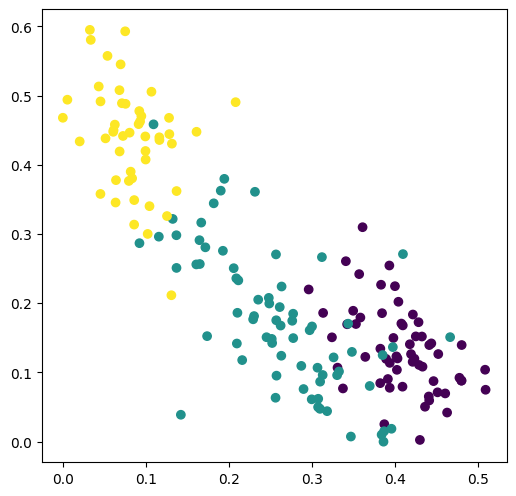

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16), dpi=100)
#plt.subplots(nrows=3, ncols=3)

for i in range(n_comp):
    for j in range(i,n_comp):
        #plt.subplot(6,6,i*6+j+1)
        if i!=j:
            plt.figure(figsize=(6,6), dpi=100)
            plt.scatter(data_nmf[:,i],data_nmf[:,j],c=Y)
           
            #plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/pca_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.show()

### **LDA Módszer** 

In [ ]:
n_comp=2   # Csak 2 lehet, mert 3 kategória van

Y=wine.target

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #LDA
a_LDA=LinearDiscriminantAnalysis(n_components=n_comp)
data_LDA=a_LDA.fit_transform(df_feature,Y)

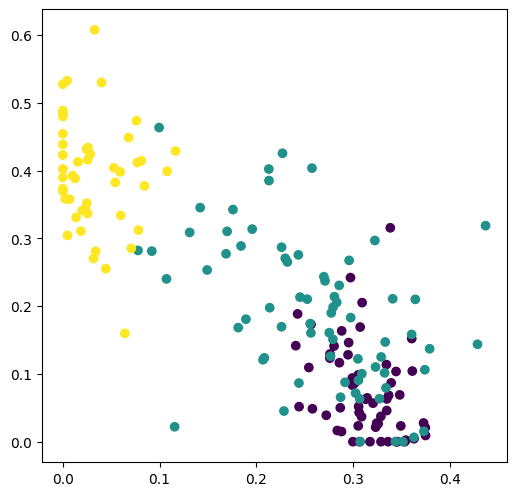

In [ ]:
for i in range(n_comp):
    for j in range(i,n_comp):
        #plt.subplot(6,6,i*6+j+1)
        if i!=j:
            plt.figure(figsize=(6,6), dpi=100)
            plt.scatter(data_lda[:,i],data_lda[:,j],c=Y)
           
            #plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/pca_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.show()

### **Klaszterezés**


1.   DBSCAN
2.   Normalizálás nélkül



In [ ]:
from sklearn import cluster, datasets, mixture
dbscan = cluster.DBSCAN()
dbscan.fit(df_feature)

#y_pred = dbscan.predict(df_feature)
y_pred = dbscan.labels_.astype(np.int)

In [ ]:

for i in range(len(cols)):
    for j in range(len(cols)):
        
        if i!=j:
            plt.figure(figsize=(12,6), dpi=100)
            plt.subplot(1,2,1)
            
            plt.scatter(df_feature[cols[i]],df_feature[cols[j]],c=y_pred)
            plt.text(0,0,"DBSCAN X:"+cols[i]+" Y:"+cols[j])   
            
            plt.subplot(1,2,2)
            #plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/pca_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.scatter(df_feature[cols[i]],df_feature[cols[j]],c=Y)
            plt.text(0,0,"Orig X:"+cols[i]+" Y:"+cols[j])   
            
            
            plt.show()

DBSCAN 


1.   Normalizálással
2.   List item



In [ ]:
wine = load_wine()
#print(data.DESCR)

cols=["Alcohol","Malic acid","Ash","Alcalionity","Magnesium","Total Phenol","Flavanoids",
                                             "Nonflavor","Proanthocyanins","Color intensity","Hue","OD280_OD315","Proline"]
df=pd.DataFrame(wine["data"][:,0:13],columns=cols)
'''

		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline])
'''
print(df)
maxi=df.max()
mini=df.min()
print(maxi,mini)
df2=(df-mini)
delta=maxi-mini
df_norm=df2/delta

     Alcohol  Malic acid   Ash  ...   Hue  OD280_OD315  Proline
0      14.23        1.71  2.43  ...  1.04         3.92   1065.0
1      13.20        1.78  2.14  ...  1.05         3.40   1050.0
2      13.16        2.36  2.67  ...  1.03         3.17   1185.0
3      14.37        1.95  2.50  ...  0.86         3.45   1480.0
4      13.24        2.59  2.87  ...  1.04         2.93    735.0
..       ...         ...   ...  ...   ...          ...      ...
173    13.71        5.65  2.45  ...  0.64         1.74    740.0
174    13.40        3.91  2.48  ...  0.70         1.56    750.0
175    13.27        4.28  2.26  ...  0.59         1.56    835.0
176    13.17        2.59  2.37  ...  0.60         1.62    840.0
177    14.13        4.10  2.74  ...  0.61         1.60    560.0

[178 rows x 13 columns]
Alcohol              14.83
Malic acid            5.80
Ash                   3.23
Alcalionity          30.00
Magnesium           162.00
Total Phenol          3.88
Flavanoids            5.08
Nonflavor         

In [ ]:
df_norm

Alcohol  Malic acid       Ash  ...       Hue  OD280_OD315   Proline
0    0.842105    0.191700  0.572193  ...  0.455285     0.970696  0.561341
1    0.571053    0.205534  0.417112  ...  0.463415     0.780220  0.550642
2    0.560526    0.320158  0.700535  ...  0.447154     0.695971  0.646933
3    0.878947    0.239130  0.609626  ...  0.308943     0.798535  0.857347
4    0.581579    0.365613  0.807487  ...  0.455285     0.608059  0.325963
..        ...         ...       ...  ...       ...          ...       ...
173  0.705263    0.970356  0.582888  ...  0.130081     0.172161  0.329529
174  0.623684    0.626482  0.598930  ...  0.178862     0.106227  0.336662
175  0.589474    0.699605  0.481283  ...  0.089431     0.106227  0.397290
176  0.563158    0.365613  0.540107  ...  0.097561     0.128205  0.400856
177  0.815789    0.664032  0.737968  ...  0.105691     0.120879  0.201141

[178 rows x 13 columns]

In [ ]:
from sklearn import cluster, datasets, mixture
dbscan = cluster.DBSCAN()
dbscan.fit(df_norm)

#y_pred = dbscan.predict(df_feature)
y_pred = dbscan.labels_.astype(np.int)

14


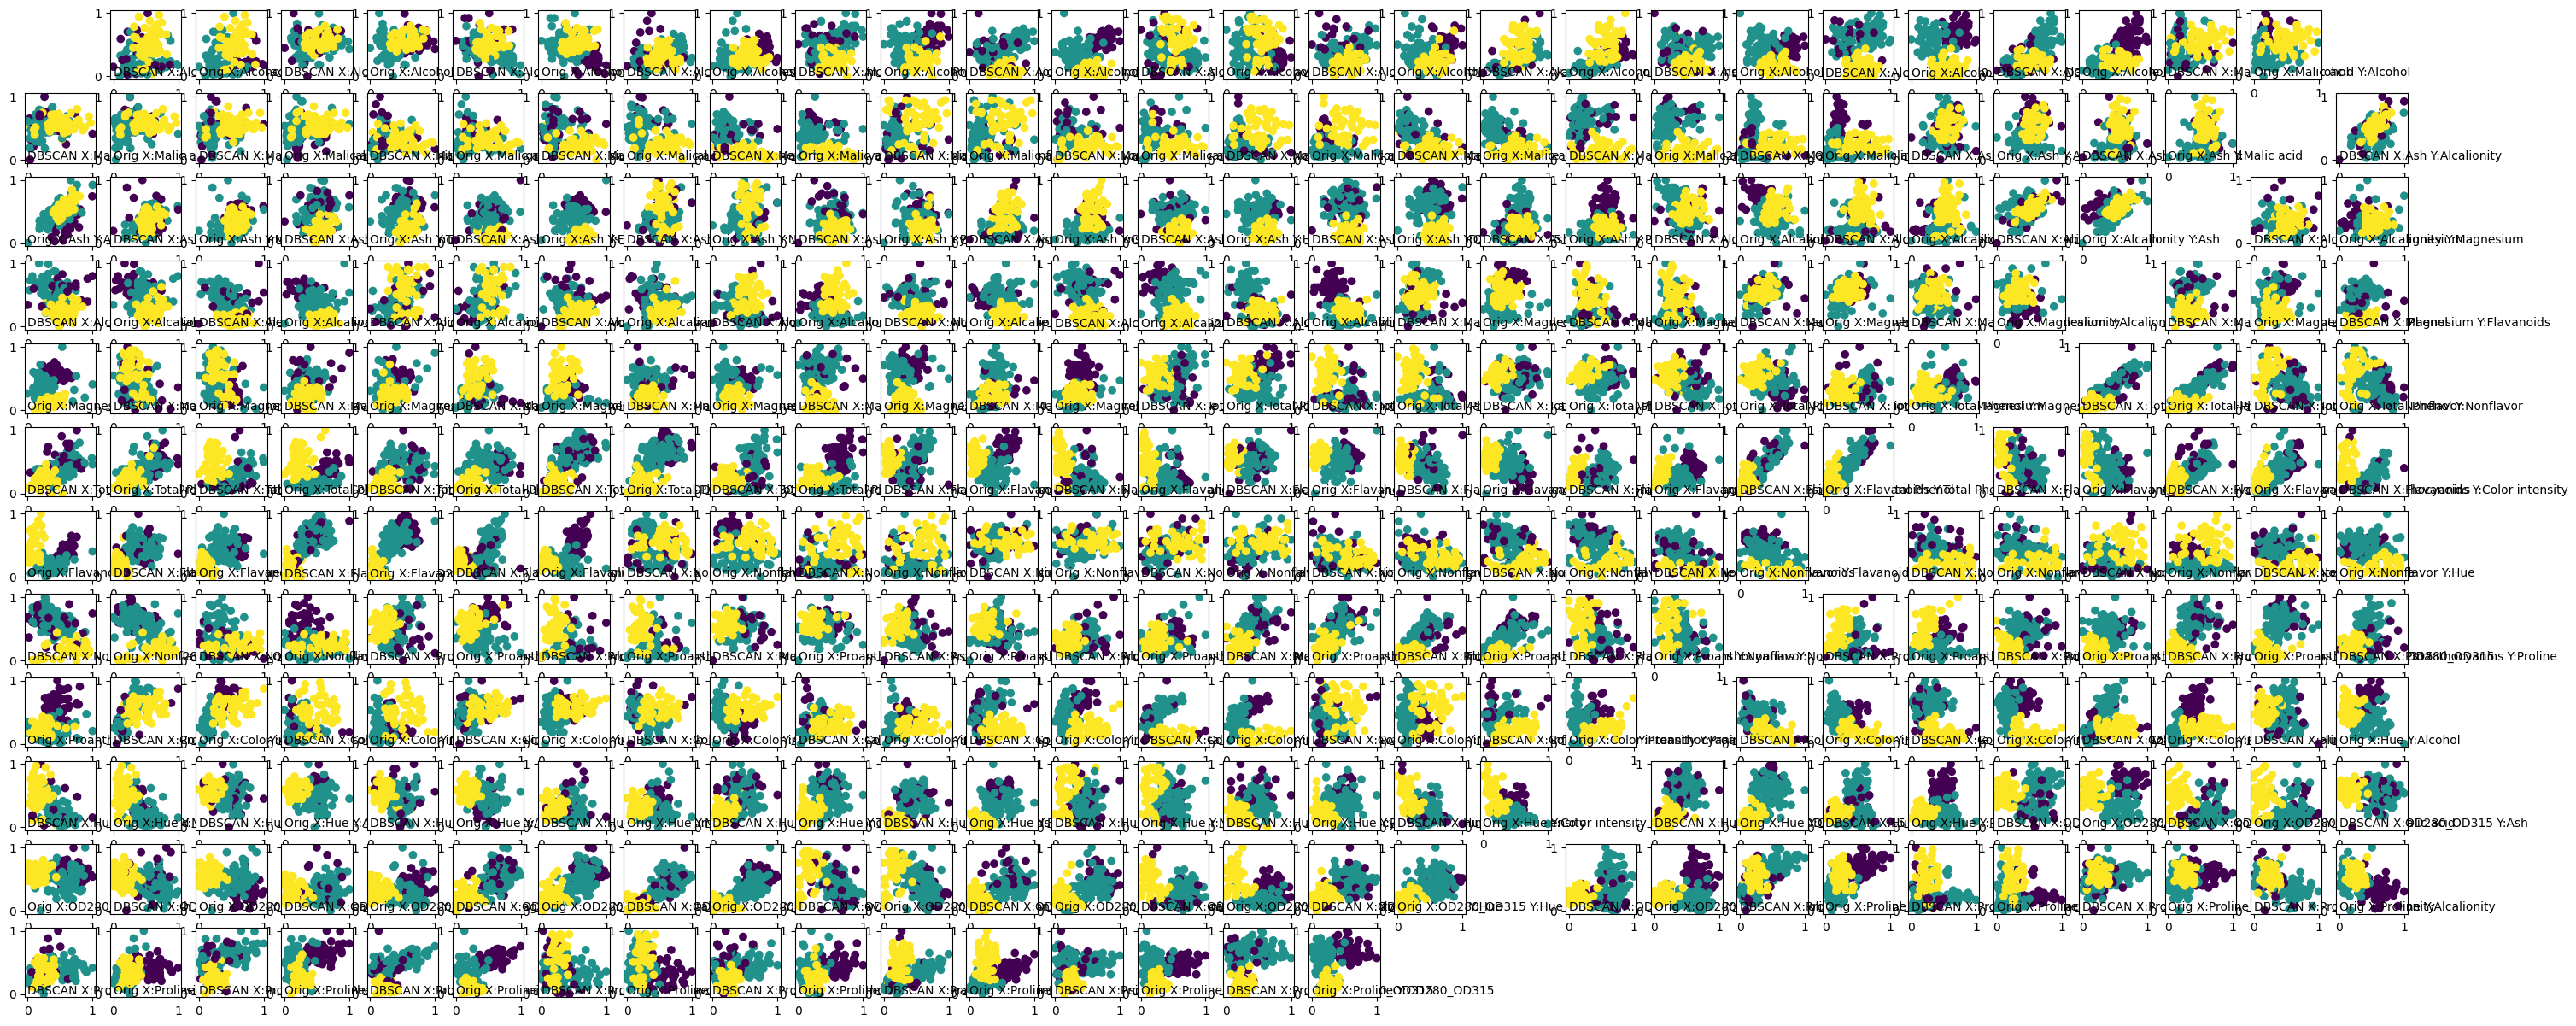

In [ ]:
xc=len(cols)+1
yc=xc
print(yc)
pltindex=0
plt.figure(figsize=(36,36), dpi=100)
for i in range(xc-1):
    for j in range(yc-1):
        pltindex+=1
        if i!=j:
            
            
            plt.subplot(xc*2,yc*2,pltindex)
            
            plt.scatter(df_norm[cols[i]],df_norm[cols[j]],c=y_pred)
            plt.text(0,0,"DBSCAN X:"+cols[i]+" Y:"+cols[j])   
            pltindex+=1
            
            plt.subplot(xc*2,yc*2,pltindex)
            #plt.savefig("/content/drive/My Drive/001_AI/04_AI/04_hazi/pca_"+str(i)+str(j)+".png",format="png",dpi=300)
            plt.scatter(df_norm[cols[i]],df_norm[cols[j]],c=Y)
            plt.text(0,0,"Orig X:"+cols[i]+" Y:"+cols[j])   
            
            
plt.show()